In [82]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
# 列ヘッダー名の設定
col_header = ('HV','Audience','Result','Rank','Savings','Hits','Home Runs','Stolen Bases','Strikeouts',
                     'Hits Allowed','Home Runs Allowed','Runs Allowed','Earned Runs','K')
# csvファイルから取得する列番号のリスト
col_num = [6,7,8,9,10,18,19,20,21,22,23,24,25,26]
# データ取得が可能な年度のリスト
years = [2014,2015,2016,2017,2018]
# チーム名頭文字のリスト
teams = ['Bs','C','D','DB','E','F','G','H','L','M','S','T']

In [84]:
# 勝敗を数値（敗：0 勝：1）へ変換する関数
def classify_victory_or_defeat(result):
    if result == '●':
        return 0
    elif result == '○':
        return 1

In [85]:
# 2012〜2018年の全チームの試合結果DataFrameを作成する関数
def combine_match_results():
    df_all = pd.DataFrame(index=[],columns=[])
    
    for year in years:
        for team in teams:
            # csvファイルのデータをDataFrameへ格納
            df = pd.read_csv('csv/{y}/{y}_{t}_match_results.csv'.format(y=year,t=team),
                                      sep=',',names=col_header,usecols=col_num)

            # NaNと引き分けを除外
            for i in range(len(df)):
                if pd.isnull(df.loc[i,'Result']) or df.loc[i,'Result'] == '△':
                    df = df.drop(i)

            # 関数match_result_classifyを適用
            df['Result'] = df['Result'].apply(classify_victory_or_defeat)

            df_all = pd.concat([df_all,df],ignore_index=True)
            
    return df_all

In [86]:
df_all = combine_match_results()

In [87]:
df_all.shape

(8430, 14)

In [43]:
df_all.head(30)

,HV,Audience,Result,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K
0,V,"26,236",1,2,18,9,1,1,12,8,0,2,2,7
1,V,"23,100",1,2,17,14,2,3,9,4,0,0,0,7
2,V,"38,561",0,2,16,8,0,1,9,6,0,2,2,8
3,V,"17,681",1,2,17,11,2,0,5,10,0,3,3,9
4,V,"19,129",1,2,16,10,1,1,4,6,1,4,3,8
5,V,"30,076",0,2,15,6,0,1,6,6,1,4,4,10
6,V,"37,837",0,2,16,6,0,2,7,12,1,3,3,6
7,H,"24,688",0,2,17,11,1,1,8,12,2,9,8,7
8,H,"18,221",1,2,18,8,0,3,4,6,0,1,1,10
9,H,"17,608",1,2,17,7,0,1,7,5,0,0,0,5


In [44]:
df_all.tail(30)

,HV,Audience,Result,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K
8400,V,"42,851",0,2,2,5,0,1,9,6,1,3,3,7
8401,V,"42,526",1,2,3,7,3,0,7,5,0,0,0,9
8402,H,"46,593",1,2,2,9,0,2,6,15,2,5,5,8
8403,H,"46,638",1,3,1,11,1,4,5,8,0,2,2,6
8404,H,"46,636",0,3,0,9,0,2,6,9,0,5,1,6
8405,H,"46,596",1,2,1,7,0,1,5,8,0,2,2,8
8406,H,"45,924",1,4,0,13,1,0,7,6,0,1,1,9
8407,V,"31,794",1,4,-1,7,1,2,8,8,0,2,1,7
8408,V,"31,819",0,4,-2,6,1,2,6,7,2,5,5,10
8409,V,"31,732",0,4,-1,11,1,2,9,6,1,7,6,8


In [45]:
df_all['Result']

0       1
1       1
2       0
3       1
4       1
5       0
6       0
7       0
8       1
9       1
10      0
11      1
12      0
13      0
14      1
15      1
16      0
17      0
18      1
19      0
20      1
21      0
22      0
23      1
24      1
25      0
26      0
27      0
28      0
29      1
       ..
8400    0
8401    1
8402    1
8403    1
8404    0
8405    1
8406    1
8407    1
8408    0
8409    0
8410    1
8411    0
8412    0
8413    0
8414    1
8415    1
8416    1
8417    0
8418    0
8419    0
8420    1
8421    1
8422    0
8423    1
8424    0
8425    1
8426    1
8427    0
8428    0
8429    1
Name: Result, Length: 8430, dtype: int64

In [46]:
# 指定されたチーム・年度のDataFrameを作成する関数
def make_dataframe(team, year):
    FILENEME_TEMPLATE = "csv/{y}/{y}_{t}_match_results.csv"
    
    # csvファイルの内容をDataFrameに格納
    df = pd.DataFrame(index=[], columns=[])
    df = pd.read_csv(FILENEME_TEMPLATE.format(y=year, t=team),
                              sep=",", names=col_header, usecols=col_num)
    
    # NaNと引き分けを除外
    for i in range(len(df)):
        if pd.isnull(df.loc[i,'Result']) or df.loc[i,'Result'] == '△':
            df = df.drop(i)
    
    # 勝敗を数値に変換
    df['Result'] = df['Result'].apply(classify_victory_or_defeat)
    
    return df

In [78]:
df_Bs_2018 = make_dataframe("Bs", 2018)

In [48]:
df_Bs_2018.shape

(138, 14)

In [49]:
len(df_Bs_2018)

138

In [50]:
len(df_Bs_2018.columns)

14

In [51]:
df_Bs_2018.size

1932

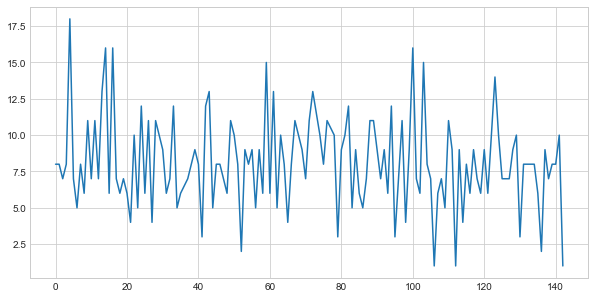

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(df_Bs_2018['Hits'])

In [57]:
df_Bs_2018["Hits"]

0       8
1       8
2       7
3       8
4      18
5       7
6       5
7       8
8       6
9      11
10      7
11     11
12      7
13     13
14     16
15      6
16     16
17      7
18      6
19      7
20      6
21      4
22     10
23      5
24     12
25      6
26     11
27      4
28     11
29     10
       ..
112     1
113     9
114     4
115     8
116     6
117     9
118     7
119     6
120     9
121     6
122    10
123    14
124    10
125     7
126     7
127     7
128     9
129    10
130     3
131     8
133     8
134     8
135     6
136     2
137     9
138     7
139     8
140     8
141    10
142     1
Name: Hits, Length: 138, dtype: int64

In [69]:
df_all = pd.DataFrame(index=[],columns=[])
df = pd.DataFrame({"today" : df_Bs_2018["Hits"],
                              "-1" : df_Bs_2018["Hits"].shift(1),
                              "-2" : df_Bs_2018["Hits"].shift(2),
                              "-3" : df_Bs_2018["Hits"].shift(3),
                              "-4" : df_Bs_2018["Hits"].shift(4),
                              "-5" : df_Bs_2018["Hits"].shift(5)})
df_all = pd.concat([df_all,df],ignore_index=True)

In [70]:
df_all

,today,-1,-2,-3,-4,-5
0,8,NaN,NaN,NaN,NaN,NaN
1,8,8.0,NaN,NaN,NaN,NaN
2,7,8.0,8.0,NaN,NaN,NaN
3,8,7.0,8.0,8.0,NaN,NaN
4,18,8.0,7.0,8.0,8.0,NaN
5,7,18.0,8.0,7.0,8.0,8.0
6,5,7.0,18.0,8.0,7.0,8.0
7,8,5.0,7.0,18.0,8.0,7.0
8,6,8.0,5.0,7.0,18.0,8.0
9,11,6.0,8.0,5.0,7.0,18.0


In [79]:
# 指定されたチーム・年度のDataFrameを作成する関数
def make_df_team_year(team, year):
    FILENEME_TEMPLATE = "csv/{y}/{y}_{t}_match_results.csv"
    
    # csvファイルの内容をDataFrameに格納
    df = pd.DataFrame(index=[], columns=[])
    df = pd.read_csv(FILENEME_TEMPLATE.format(y=year, t=team),
                              sep=",", names=col_header, usecols=col_num)
    
    return df

In [146]:
def make_df_hits_count():
    df_all = pd.DataFrame(index=[],columns=[])
    
    for year in years:
        for team in teams:
            df_team_year = make_df_team_year(team, year)
            df_temp = pd.DataFrame({"today" : df_team_year["Hits"],
                                                   "-1" : df_team_year["Hits"].shift(1),
                                                   "-2" : df_team_year["Hits"].shift(2),
                                                   "-3" : df_team_year["Hits"].shift(3),
                                                   "-4" : df_team_year["Hits"].shift(4),
                                                   "-5" : df_team_year["Hits"].shift(5)})
            
            # NaNを除外
            for i in range(len(df_temp)):
                if pd.isnull(df_temp.loc[i,"-1"]) or pd.isnull(df_temp.loc[i,"-2"]) or pd.isnull(df_temp.loc[i,"-3"]) or pd.isnull(df_temp.loc[i,"-4"]) or pd.isnull(df_temp.loc[i,"-5"]):
                    df_temp = df_temp.drop(i)
            
            df_all = pd.concat([df_all,df_temp],ignore_index=True)
    
            df_today = df_all["today"]
            df_all = df_all.drop("today", axis=1)
            df_all["past_5games_mean"] = df_all.mean(1)
            df_all["today"] = df_today
                                       
    return df_all

In [147]:
df_hits_count = make_df_hits_count()
df_hits_count.shape

/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



(8290, 7)

In [148]:
df_hits_count.head(10)

,-1,-2,-3,-4,-5,past_5games_mean,today
0,10.0,11.0,8.0,14.0,9.0,10.4,6
1,6.0,10.0,11.0,8.0,14.0,9.8,6
2,6.0,6.0,10.0,11.0,8.0,8.2,11
3,11.0,6.0,6.0,10.0,11.0,8.8,8
4,8.0,11.0,6.0,6.0,10.0,8.2,7
5,7.0,8.0,11.0,6.0,6.0,7.6,5
6,5.0,7.0,8.0,11.0,6.0,7.4,10
7,10.0,5.0,7.0,8.0,11.0,8.2,10
8,10.0,10.0,5.0,7.0,8.0,8.0,5
9,5.0,10.0,10.0,5.0,7.0,7.4,5


In [149]:
from sklearn.ensemble import RandomForestRegressor

#def predict_hits_count(team):
    #df = make_dataframe(team, 2018)

In [150]:
X = df_hits_count.past_5games_mean
Y = df_hits_count.today


# Xを[X 1]の形にする
X = np.array([[value, 1] for value in X],dtype=float)

# 最小二乗法の計算を実行
a, b = np.linalg.lstsq(X, Y)[0]

/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


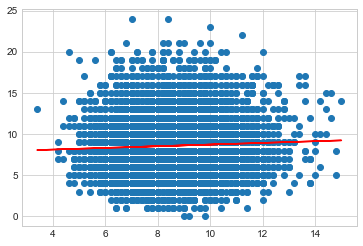

In [151]:
# 元のデータをプロット
plt.plot(df_hits_count.past_5games_mean, df_hits_count.today, 'o')

#求めた回帰直線を描く
x = df_hits_count.past_5games_mean
plt.plot(x, a*x+b, 'r')

In [152]:
df_hits_count = df_hits_count.drop("past_5games_mean",1)
df_hits_count.head(10)

,-1,-2,-3,-4,-5,today
0,10.0,11.0,8.0,14.0,9.0,6
1,6.0,10.0,11.0,8.0,14.0,6
2,6.0,6.0,10.0,11.0,8.0,11
3,11.0,6.0,6.0,10.0,11.0,8
4,8.0,11.0,6.0,6.0,10.0,7
5,7.0,8.0,11.0,6.0,6.0,5
6,5.0,7.0,8.0,11.0,6.0,10
7,10.0,5.0,7.0,8.0,11.0,10
8,10.0,10.0,5.0,7.0,8.0,5
9,5.0,10.0,10.0,5.0,7.0,5


In [153]:
import sklearn
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()


# 説明変数
X_multi = df_hits_count.drop("today",1)

# 目的変数
Y_target = df_hits_count.today

In [154]:
# モデルの作成
lreg.fit(X_multi, Y_target)

/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
# 切片の値
lreg.intercept_

7.712689165003826

In [156]:
# 係数の数
len(lreg.coef_)

5

In [160]:
coeff_df = DataFrame(df_hits_count.columns)
coeff_df.columns = ['Features']
# 求めた係数を代入
coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,-1,0.023669
1,-2,0.019784
2,-3,0.006844
3,-4,0.027038
4,-5,0.023948
5,today,NaN


In [163]:
# 説明変数をX、目的変数をYとして受け取る
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi,Y_target)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6217, 5) (2073, 5) (6217,) (2073,)


In [164]:
reg = LinearRegression()

# 学習用のデータのみでモデルを作成
lreg.fit(X_train, Y_train)

# 学習用のデータで予想
pred_train = lreg.predict(X_train)

# テスト用のデータで予想
pred_test = lreg.predict(X_test)

In [165]:
# X_trainを使ったモデルの平均二乗誤差
np.mean((Y_train - pred_train)**2)

11.211460782713669

In [166]:
# X_testを使ったモデルの平均二乗誤差
np.mean((Y_test - pred_test)**2)

11.168019208397382

Text(0.5,1,'Hits Count')

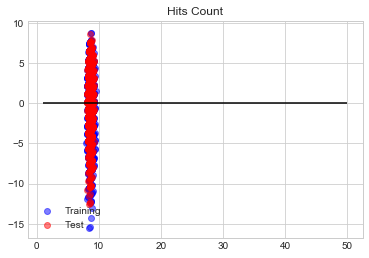

In [167]:
# 学習用データの残差プロット
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha=0.5)

# テスト用データの残差プロット
test = plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha=0.5)

# y=0の水平な線を描く
plt.hlines(y=0, xmin=1.0, xmax=50)

plt.legend((train, test), ('Training','Test'), loc='lower left')
plt.title('Hits Count')